## Визуализация данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.graph_objects as go

from plotly.graph_objs import *
from plotly.offline import iplot
from plotly.graph_objs import Scatter

offline.init_notebook_mode(connected=True)
%matplotlib inline

df = pd.read_csv('CompleteDataset.csv', low_memory=False)
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### *1. Гистограмма возраста игроков*

Text(0.5, 1.0, 'Распределение игроков по возрасту')

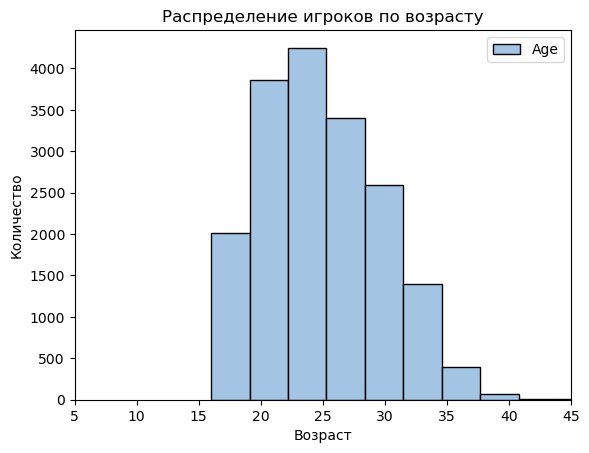

In [2]:
plt.hist(x='Age',data=df,color='#A4C4E3',edgecolor='black')
plt.xlim(5,45)
plt.xlabel('Возраст') 
plt.ylabel('Количество') 
plt.legend(['Age']) 
plt.title('Распределение игроков по возрасту') 

##### *2. Сравнение зависимости зарплаты от возраста игрока*

In [3]:
df['Wage'].head()

0    €565K
1    €565K
2    €280K
3    €510K
4    €230K
Name: Wage, dtype: object

In [4]:
df['int_wage'] = df['Wage'].map(lambda x: int(x[1:-1])*1000 if x[-1]=='K' else int(x[1:])*1000)
df['int_wage'].head()

0    565000
1    565000
2    280000
3    510000
4    230000
Name: int_wage, dtype: int64

Text(0.5, 1.0, 'Распределение зарплаты по возрасту')

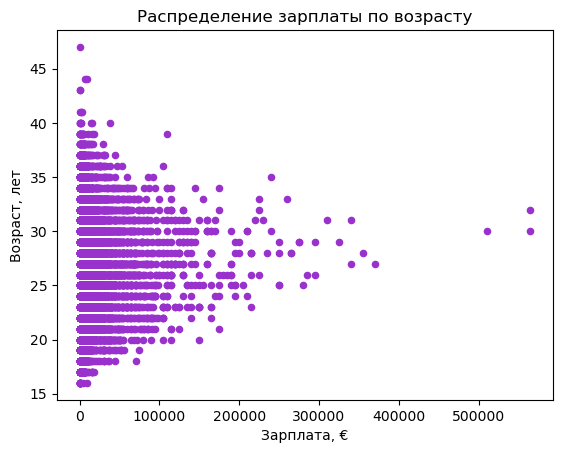

In [5]:
df.plot.scatter(x='int_wage',y='Age', color='#9932CC')

plt.xlabel('Зарплата, €')
plt.ylabel('Возраст, лет') 
plt.title('Распределение зарплаты по возрасту')

##### *3. Сравнение зависимости скорости от возраста игрока*

In [6]:
df['Speed'] = df['Sprint speed'].map(lambda x: int(x[0:2]))
df['Speed'].head()

0    91
1    87
2    90
3    77
4    61
Name: Speed, dtype: int64

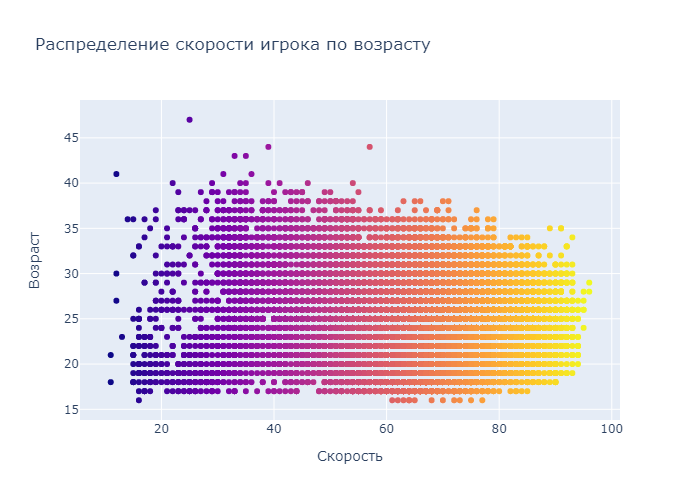

In [7]:
fig = go.Figure()

trace = go.Scatter(x=df.Speed,
                   y=df.Age,
                   mode='markers',
                   marker_color=df.Speed,
                   text=df.Name
)
fig.add_trace(trace)

fig.update_layout(title='Распределение скорости игрока по возрасту',
    xaxis_title="Скорость",
    yaxis_title="Возраст",
)

# Убрать "png", чтобы посмотреть подробно
fig.show("png")

##### *4. Распределение количества футболистов по странам*

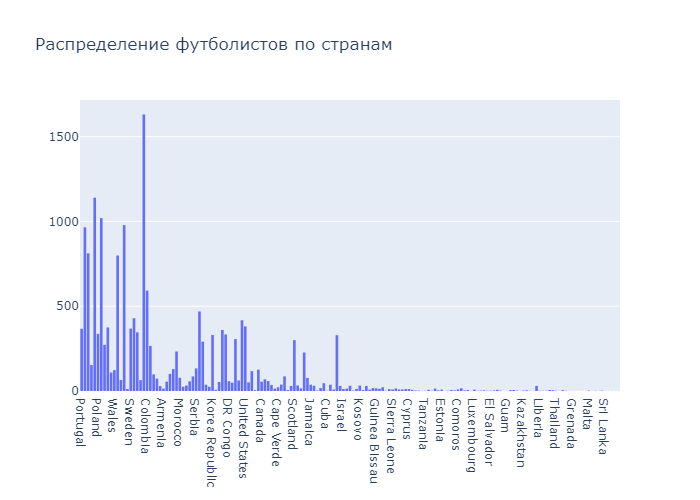

In [8]:
fig = go.Figure()

trace = go.Histogram(x=df.Nationality)
fig.add_trace(trace)

fig.update_layout(title='Распределение футболистов по странам')

# Убрать "png", чтобы посмотреть подробно
fig.show("png")

Text(0.5, 1.0, 'Зависимость Overall от Age')

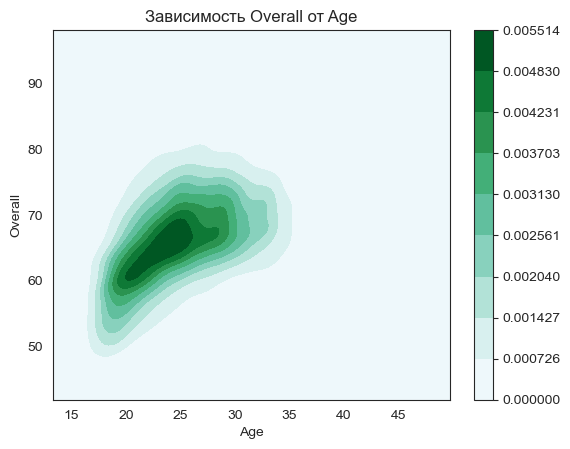

In [9]:
sns.set_style("white")
sns.kdeplot(data=df, x="Age", y="Overall", cmap="BuGn", shade=True, cbar=True, thresh=0)
 
plt.title('Зависимость Overall от Age')

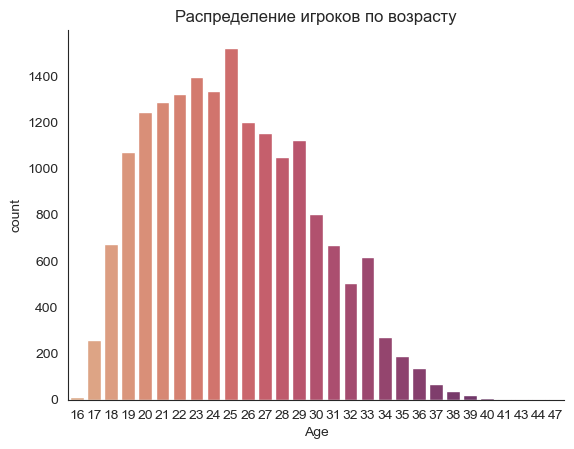

In [10]:
sns.countplot(x=df["Age"], palette="flare")
plt.title('Распределение игроков по возрасту')
sns.despine()

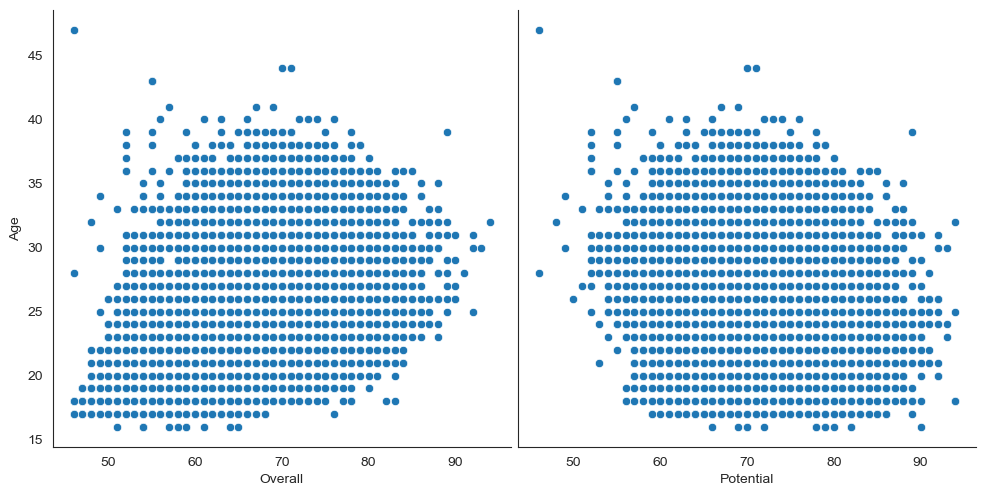

In [11]:
sns.set_style("white")
sns.pairplot(
    df,
    x_vars=["Overall", "Potential"],
    y_vars=["Age"],
    kind="scatter",
    height=5,
)

<AxesSubplot:xlabel='Overall', ylabel='Potential'>

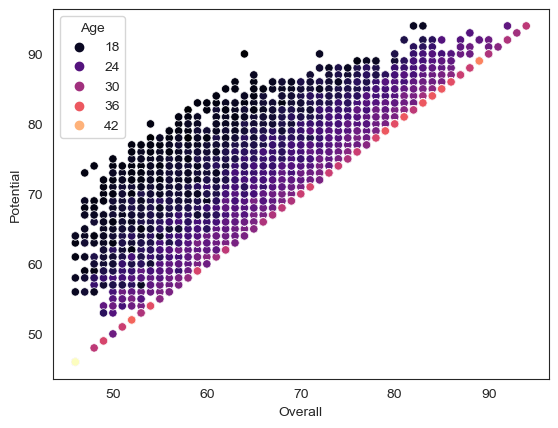

In [12]:
sns.set_style("white")

sns.scatterplot(data=df, x="Overall", y="Potential", palette="magma", hue="Age")